<a href="https://colab.research.google.com/github/marcus2348532/deep_learning/blob/main/2348532_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Feb 16 04:11:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
torch.cuda.is_available()

False

AND

In [ ]:
input=torch.tensor([(0,0),(0,1),(1,0),(1,1)],dtype=torch.double)
output=torch.tensor([(0,0,0,1)],dtype=torch.double)
weight=torch.tensor([1,1],dtype=torch.double)
bias=torch.tensor([(-2)],dtype=torch.double)
weight.resize_(1,2)
and_calc=weight.mm(input.t())
and_calc=and_calc+bias
print("activation: ",and_calc)
and_output=[[1 if i>=0 else 0 for i in x]for x in and_calc]
print("AND output: ",and_output)
mis=0
for i in range(4):
  if output[0][i]!=and_output[0][i]:
    mis=mis+1
print("misclassifications: ",mis)

activation:  tensor([[-2., -1., -1.,  0.]], dtype=torch.float64)
AND output:  [[0, 0, 0, 1]]
misclassifications:  0


OR

In [ ]:
input=torch.tensor([(0,0),(0,1),(1,0),(1,1)],dtype=torch.double)
output=torch.tensor([(0,1,1,1)],dtype=torch.double)
weight=torch.tensor([1,1],dtype=torch.double)
bias=torch.tensor([(-2)],dtype=torch.double)
weight.resize_(1,2)
and_calc=weight.mm(input.t())
and_calc=and_calc+bias
print("activation: ",and_calc)
and_output=[[1 if i>=0 else 0 for i in x]for x in and_calc]
print("OR output: ",and_output)
mis=0
for i in range(4):
  if output[0][i]!=and_output[0][i]:
    mis=mis+1
print("misclassifications: ",mis)

activation:  tensor([[-2., -1., -1.,  0.]], dtype=torch.float64)
OR output:  [[0, 0, 0, 1]]
misclassifications:  2


NAND

In [ ]:
input=torch.tensor([(0,0),(0,1),(1,0),(1,1)],dtype=torch.double)
output=torch.tensor([(1,1,1,0)],dtype=torch.double)
weight=torch.tensor([-1,-3],dtype=torch.double)
bias=torch.tensor([(-2)],dtype=torch.double)
weight.resize_(1,2)
and_calc=weight.mm(input.t())
and_calc=and_calc+bias
print("activation: ",and_calc)
and_output=[[1 if i>=0 else 0 for i in x]for x in and_calc]
print("NAND output: ",and_output)
mis=0
for i in range(4):
  if output[0][i]!=and_output[0][i]:
    mis=mis+1
print("misclassifications: ",mis)

activation:  tensor([[-2., -5., -3., -6.]], dtype=torch.float64)
NAND output:  [[0, 0, 0, 0]]
misclassifications:  3


XOR

In [ ]:
input=torch.tensor([(0,0),(0,1),(1,0),(1,1)],dtype=torch.double)
output=torch.tensor([(0,1,1,0)],dtype=torch.double)
weight=torch.tensor([1,-1],dtype=torch.double)
bias=torch.tensor([(-2)],dtype=torch.double)
weight.resize_(1,2)
and_calc=weight.mm(input.t())
and_calc=and_calc+bias
print("activation: ",and_calc)
and_output=[[1 if i>=0 else 0 for i in x]for x in and_calc]
print("XOR output: ",and_output)
mis=0
for i in range(4):
  if output[0][i]!=and_output[0][i]:
    mis=mis+1
print("misclassifications: ",mis)

activation:  tensor([[-2., -3., -1., -2.]], dtype=torch.float64)
XOR output:  [[0, 0, 0, 0]]
misclassifications:  2


PERCEPTRON LEARNING ALGORITHM - XOR

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
predictions = model(inputs)
print("Predictions:")
for i in range(4):
    print(f"Input: {inputs[i].tolist()}, Prediction: {predictions[i].item():.4f}")


Epoch: 1, Loss: 0.8168
Epoch: 101, Loss: 0.6933
Epoch: 201, Loss: 0.6932
Epoch: 301, Loss: 0.6932
Epoch: 401, Loss: 0.6932
Epoch: 501, Loss: 0.6932
Epoch: 601, Loss: 0.6932
Epoch: 701, Loss: 0.6931
Epoch: 801, Loss: 0.6931
Epoch: 901, Loss: 0.6931
Predictions:
Input: [0.0, 0.0], Prediction: 0.5000
Input: [0.0, 1.0], Prediction: 0.4996
Input: [1.0, 0.0], Prediction: 0.5004
Input: [1.0, 1.0], Prediction: 0.5000


2.

Global Minima found at x = -1.1105093598463913, f(x) = -3.2463942726873016
Number of iterations: 14


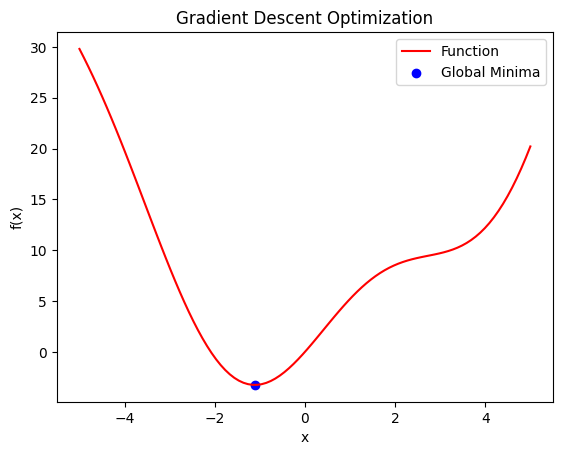

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def equation(x):
    return x**2 + 5*np.sin(x)
def gradient(x):
    return 2*x + 5*np.cos(x)
def gradient_descent(initial_guess, learning_rate, tolerance):
    x = initial_guess
    iterations = 0
    while True:
        x_new = x - learning_rate * gradient(x)
        if abs(x_new - x) < tolerance:
            break
        x = x_new
        iterations += 1
    return x, iterations
def plot_results(x_vals, y_vals, minima_x, minima_y):
    plt.plot(x_vals, y_vals,color='r', label='Function')
    plt.scatter(minima_x, minima_y, color='blue', label='Global Minima')
    plt.title('Gradient Descent Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
initial_guess = 0.0
learning_rate = 0.1
tolerance = 1e-6
minima_x, iterations = gradient_descent(initial_guess, learning_rate, tolerance)
minima_y = equation(minima_x)
x_vals = np.linspace(-5, 5, 100)
y_vals = equation(x_vals)
print(f"Global Minima found at x = {minima_x}, f(x) = {minima_y}")
print(f"Number of iterations: {iterations}")
plot_results(x_vals, y_vals, minima_x, minima_y)